In [ ]:
#import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#read the csv files as dataframe objects
ipl=pd.read_csv('C:/Users/jenas/Downloads/deliveries.csv')
mtc=pd.read_csv('C:/Users/jenas/Downloads/matches.csv')

In [ ]:
#Dataset cleaning

mtc=mtc.replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl=ipl.replace('Rising Pune Supergiant','Rising Pune Supergiants')
mtc=mtc.replace(mtc['umpire1'].value_counts().keys().tolist(), np.nan)                          #replace all umpire names by NaN
mtc=mtc.replace(mtc['umpire2'].value_counts().keys().tolist(), np.nan)

ipl.replace(r'^\s*$',np.nan,regex=True)                                                         #replace all blank spaces by NaN

a=[*range(7894,7954),*range(11137,11154),*range(11309,11348),*range(11412,11416)]    #rectify faulty indexing in both dataframes
b=[*range(637,697),*range(697,714),*range(714,753),*range(753,757)]
ipl.replace(a,b,inplace=True)
mtc.replace(a,b,inplace=True)

ipl1=ipl.replace(['run out','retired hurt','obstructing the field'],np.nan)    #create a copy of deliveries.csv for bowler stats

In [ ]:
mtc

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",NaN,NaN,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,NaN,NaN,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,NaN,NaN,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,NaN,NaN,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,NaN,NaN,NaN
752,753,2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,NaN,NaN,NaN
753,754,2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,755,2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,NaN,NaN,Chettithody Shamshuddin


In [ ]:
team1=mtc.groupby('team1')                             #group matches.csv by team1 and team2 to get team-based data
team2=mtc.groupby('team2')
teams=[team for team,_ in team1]                       #list of all team names which have played IPL
winner=mtc.groupby('winner')                           #group matches.csv by winner
tie=mtc[['team1','team2','result']][(mtc['result']=='tie')] 
tie1=tie.groupby('team1')                                            #find subset of mtc with only tied matches data
tie2=tie.groupby('team2')

nres=mtc[['team1','team2','result']][(mtc['result']=='no result')]   #find subset of mtc with only no result matches data
nres1=nres.groupby('team1')
nres2=nres.groupby('team2')

sesn=mtc.groupby('season').last()                                    #create a subset of mtc with only final matches data
sesn1=sesn.groupby('winner')                                         #group this subset acc to winners of IPL

In [ ]:
num=len(teams)                                       #number of teams which have played in IPL 

#intialize arrays to store values of performance attributes for each team
total=np.zeros(num)
won=np.zeros(num)
lost=np.zeros(num)
ties=np.zeros(num)
nores=np.zeros(num)
titles=np.zeros(num)
win_perc=np.zeros(num)
rating=np.zeros(num)

In [ ]:
for i in range(num):
	team=teams[i]                                                             #name of each team
	won[i]=len(winner.get_group(team))                                        #no of matches won by team
	total[i]=len(team1.get_group(team))+len(team2.get_group(team))            #total matches played by team
	
	t1,t2,n1,n2=0,0,0,0

	if team in tie['team1'].unique():
		t1=len(tie1.get_group(team))
	if team in tie['team2'].unique():
		t2=len(tie2.get_group(team))


	if team in nres['team1'].unique():
		n1=len(nres1.get_group(team))
	if team in nres['team2'].unique():
		n2=len(nres2.get_group(team))

	ties[i]=t1+t2                                                              #no. of matches tied by team
	nores[i]=n1+n2                                                             #no. of no result matches for team

	if team in sesn1['winner'].unique():
		titles[i]=len(sesn1.get_group(team))                                   #no. of titles won by team

	lost[i]=total[i]-won[i]-nores[i]-ties[i]                                   #no. of matches lost by team
	win_perc[i]=(won[i])/(total[i]-nores[i])*100.0                             #team win percentage

#The teams have been rated as follows:
#No. of titles won=70%
#Overall win percentage=30%    
#The attributes for each team have been divided by the max values for each attribute
#to equalise their contribution.

	if (total[i]>30):                                                          #team will be rated only if it played >30 matches
		rating[i]=titles[i]/12*70.0 + win_perc[i]/100*30.0

In [ ]:
#create the teams dataframe
over_teams=pd.DataFrame({'Teams':teams, 'Total matches':total, 'Matches won':won, 'Matches lost':lost, 
			'Matches tied':ties, 'No result':nores, 'Win Percent':win_perc, 'Titles won':titles, 'Ratings':rating})

over_teams.set_index('Teams',inplace=True)
over_teams.sort_values('Ratings',ascending=False,inplace=True)	     #arrange teams in descending order of ratings

In [ ]:
print("The overall standings of all IPL teams based on my system of ratings is:")
print(over_teams)

print("The top 3 teams across all 12 seasons of IPL from 2008 to 2019 are:")
for team in over_teams.index[:3]:
	print(team)

The overall standings of all IPL teams based on my system of ratings is:
                             Total matches  Matches won  Matches lost  \
Teams                                                                   
Mumbai Indians                       187.0        109.0          76.0   
Chennai Super Kings                  164.0        100.0          63.0   
Kolkata Knight Riders                178.0         92.0          83.0   
Sunrisers Hyderabad                  108.0         58.0          48.0   
Rajasthan Royals                     147.0         75.0          67.0   
Deccan Chargers                       75.0         29.0          46.0   
Royal Challengers Bangalore          180.0         84.0          91.0   
Kings XI Punjab                      176.0         82.0          92.0   
Delhi Daredevils                     161.0         67.0          91.0   
Pune Warriors                         46.0         12.0          33.0   
Delhi Capitals                        16.0         

In [ ]:
bts1=ipl.groupby('batsman')
batsmen=[bts for bts,_ in bts1]                         #list of all batsmen names

nbts=len(batsmen)

In [ ]:
#initialize arrays to store values of attributes for each batsman
matches=np.zeros(nbts)
balls=np.zeros(nbts)
runs=np.zeros(nbts)
strike=np.zeros(nbts)
bat_avg=np.zeros(nbts)
fours=np.zeros(nbts)
sixes=np.zeros(nbts)
thirties=np.zeros(nbts)

In [ ]:
for i in range(nbts):

	batsman=batsmen[i]                                                    #name of the batsman
	bat_st=bts1.get_group(batsman)                                        #overall stats for the batsman
	balls[i]=len(bat_st)                                                  #total no. of balls faced by the batsman
	runs[i]=bat_st['batsman_runs'].sum()                                  #total no. of runs scored by the batsman
	strike[i]=runs[i]/balls[i]*100.0                                      #overall strike rate of the batsman
	
	bat_runs=bat_st['batsman_runs'].value_counts()
	if (bat_runs.index.__contains__(4)):
		fours[i]=bat_st['batsman_runs'].value_counts()[4]                 #total fours scored by batsman
	if (bat_runs.index.__contains__(6)):	
		sixes[i]=bat_st['batsman_runs'].value_counts()[6]                 #total sixes scored by batsman

	
	bat_sortbymtc=bat_st.groupby('match_id')
	bat_mtcid=[i for i,_ in bat_sortbymtc]                                #list of all match ids in which batsman batted
	matches[i]=len(bat_mtcid)
	bat_avg[i]=runs[i]/matches[i]                                         #batting average of the batsman

	for j in bat_mtcid:

		if (bat_sortbymtc.get_group(j)['batsman_runs'].sum() >= 30.0):
			thirties[i]+=1                                                #no. of 30+ scores by batsman

In [ ]:
#create the batsmen dataframe
bats_overall=pd.DataFrame({'Name':batsmen, 'Matches':matches, 'Runs':runs, 'Average':bat_avg, 'Strike Rate':strike, 
			 "30+ scores":thirties,'Fours':fours,'Sixes':sixes})

ratings=np.zeros(nbts)                                   #initialize array to store ratings for each batsman


run_max=runs.max()
avg_max=bat_avg.max()                                    #Store the best figures for each attribute in the batsmen data
strike_max=strike.max()
boundary_max=fours.max()+sixes.max()

#The rating system used to rate batsmen is assigned in the following order of weightage:
# Runs scored = 40%
# Batting average = 30%
# Strike rate = 20%
# No. of boundaries scored = 10%
#The values of attributes for each batsman have been divided by the best figures for the corresponding attributes in the dataframe
#in order to equalise their contributions to the ratings.

for i in range(nbts):
    if (matches[i]>=50.0):
        ratings[i]=(runs[i]/run_max)*40.0 +(bat_avg[i]/avg_max)*30.0 +(strike[i]/strike_max)*20.0 +((fours[i]+sixes[i])/boundary_max)*10.0
    
bats_overall.insert(8,'Ratings',ratings,True)                         #Insert a new column with ratings of each batsman
bats_overall.set_index('Name',inplace=True)
bats_overall.sort_values('Ratings',ascending=False,inplace=True)      #Sort bowlers dataframe acc to descending order of ratings

print("The overall top 10 batsmen in all 12 IPL seasons are:")
bats_overall.head(10)

The overall top 10 batsmen in all 12 IPL seasons are:


,Matches,Runs,Average,Strike Rate,30+ scores,Fours,Sixes,Ratings
Name,,,,,,,,
V Kohli,169.0,5434.0,32.153846,129.042983,77.0,482.0,191.0,78.824679
DA Warner,126.0,4741.0,37.626984,139.523249,67.0,459.0,181.0,77.683438
CH Gayle,124.0,4560.0,36.774194,145.640370,56.0,376.0,327.0,77.032365
SK Raina,189.0,5415.0,28.650794,133.902077,76.0,495.0,195.0,77.027297
AB de Villiers,142.0,4428.0,31.183099,148.740343,56.0,357.0,214.0,71.177188
RG Sharma,182.0,4914.0,27.000000,128.773585,68.0,431.0,194.0,71.108909
S Dhawan,158.0,4632.0,29.316456,122.669492,63.0,526.0,96.0,69.994500
RV Uthappa,170.0,4446.0,26.152941,127.319588,65.0,436.0,156.0,66.617757
MS Dhoni,170.0,4477.0,26.335294,134.930681,61.0,297.0,207.0,66.540077


In [ ]:
y=bats_overall.sort_values('Runs',ascending=False).head(10)              #Sort the batsmen dataframe in decreasing order of runs
bats=[bts for bts in y.index]                                            #Store names of top 10 batsmen by runs
runs=[y.loc[bts]['Runs'] for bts in bats]                                #Store runs scored by them
s=pd.Series(runs,bats)

Text(0.5, 1.0, 'Batsmen with most runs in IPL history')

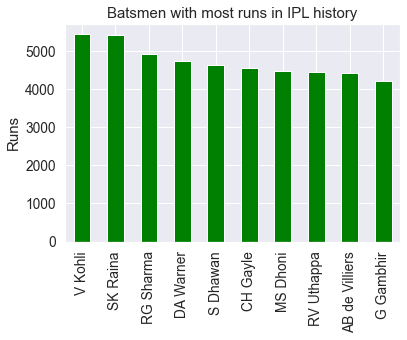

In [ ]:
#plotting the most runs scored by batsmen in IPL history
s.plot.bar(color='green')
plt.ylabel('Runs')
plt.title('Batsmen with most runs in IPL history')

In [ ]:
bwl1=ipl1.groupby('bowler')                    
bowlers=[bwl for bwl,_ in bwl1]                  #obtain the list of all bowler names

nbwl=len(bowlers)                                

In [ ]:
#initialize arrays to store values of attributes for each bowler in the data
matches=np.zeros(nbwl)
balls=np.zeros(nbwl)
runs=np.zeros(nbwl)                          
bwl_avg=np.zeros(nbwl)
wkt=np.zeros(nbwl)
eco=np.zeros(nbwl)
three=np.zeros(nbwl)

In [ ]:
for i in range(nbwl):
    
    bowler=bowlers[i]                                            #name of the bowler
    bwl_st=bwl1.get_group(bowler)                                #overall stats for the bowler
    balls[i]=len(bwl_st)                                         #total no. of balls bowled by the bowler
    runs[i]=bwl_st['total_runs'].sum()                           #total runs given by the bowler
    eco[i]=runs[i]/balls[i]*6.0                                  #avg economy of the bowler
    wkt[i]=bwl_st['dismissal_kind'].value_counts().sum()         #total wickets taken by the bowler
    bwl_avg[i]=runs[i]/wkt[i]                                    #bowling average of the bowler
    
    bwl_sortbymtc=bwl_st.groupby('match_id')
    bwl_mtcid=[i for i,_ in bwl_sortbymtc]                       #list of all match ids in which bowler has bowled
    matches[i]=len(bwl_mtcid)      
    
    for j in bwl_mtcid:
        
        x=bwl_sortbymtc.get_group(j)                             #bowler's stats for each match
        if (x['dismissal_kind'].value_counts().sum() >= 3.0):    
            three[i]+=1                                          #no. of 3+ wicket hauls by bowler

In [ ]:
#create the bowlers dataframe
bwls_overall=pd.DataFrame({'Name':bowlers, 'Matches':matches, 'Wickets':wkt, 'Average':bwl_avg, 'Economy':eco,
                          '3-wicket hauls':three})

ratings=np.zeros(nbwl)                                          #initialize array to store ratings for each bowler

wkt_max=wkt.max()
avg_min=bwl_avg.min()                                           #Store the best figures for each attribute in the bowlers data
eco_min=eco.min()
three_max=three.max()

#The rating system used to rate bowlers is assigned in the following order of weightage:
# Wickets taken = 35%
# Avg. economy = 35%
# Bowling average = 15%
# No. of 3+ wicket hauls = 15%
#The values of attributes for each bowler have been divided by the best figures for the corresponding attributes in the dataframe
#in order to equalise their contributions to the ratings.

for i in range(nbwl):
    ratings[i]=(wkt[i]/wkt_max)*35 +(eco_min/eco[i])*35 +(avg_min/bwl_avg[i])*15 +(three[i]/three_max)*15
    
bwls_overall.insert(6,'Ratings',ratings,True)                         #Insert a new column with ratings of each bowler
bwls_overall.set_index('Name',inplace=True)
bwls_overall.sort_values('Ratings',ascending=False,inplace=True)      #Sort bowlers dataframe acc to descending order of ratings

print("The overall top 10 bowlers in all 12 IPL seasons are:")
bwls_overall.head(10)

The overall top 10 bowlers in all 12 IPL seasons are:


,Matches,Wickets,Average,Economy,3-wicket hauls,Ratings
Name,,,,,,
SL Malinga,122.0,170.0,20.652941,7.083389,19.0,50.000000
A Mishra,147.0,156.0,24.679487,7.282472,16.0,44.749226
PP Chawla,156.0,149.0,27.872483,7.892936,12.0,40.150155
Harbhajan Singh,157.0,150.0,27.000000,7.041437,11.0,39.566563
DJ Bravo,131.0,147.0,25.394558,8.261896,11.0,38.948916
B Kumar,117.0,133.0,24.541353,7.234577,12.0,36.856037
UT Yadav,118.0,119.0,30.588235,8.383877,14.0,35.552632
SP Narine,109.0,122.0,24.090164,6.782308,12.0,34.591331
A Nehra,88.0,106.0,23.933962,7.711246,14.0,32.876161


In [ ]:
z=bwls_overall.sort_values('Wickets',ascending=False).head(10)       #Sort the bowlers dataframe in descending order of wickets
bwlrs=[bwlr for bwlr in z.index]                                     #Store names of top 10 bowlers acc to wickets
wkts=[z.loc[bwlr]['Wickets'] for bwlr in bwlrs]                      #Store wickets taken by them
s=pd.Series(wkts,bwlrs)

Text(0.5, 1.0, 'Bowlers with most wickets in IPL history')

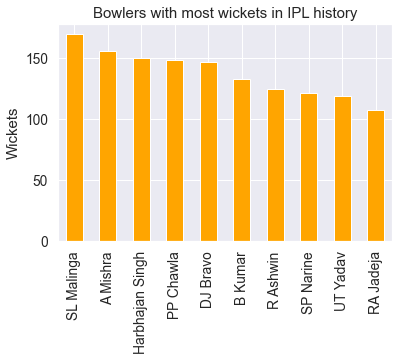

In [ ]:
#plotting the most no. of wickets taken by bowlers in IPL history
s.plot.bar(color='orange')
plt.ylabel('Wickets')
plt.title('Bowlers with most wickets in IPL history')


mtc=ipl.groupby('match_id').get_group(1)
inning=mtc.groupby('inning').get_group(1)
inning

In [ ]:
ipl_mtc=ipl.groupby('match_id')
total_match=len(ipl_mtc)

In [ ]:
#initialize arrays to store values of these attributes for each match of IPL

target=np.zeros(total_match,dtype='float32')
wk1=np.zeros(total_match,dtype='float32')
run_last10=np.zeros(total_match,dtype='float32')
wkt_stdev1=np.zeros(total_match,dtype='float32')
ptsp1=np.zeros(total_match,dtype='float32')

wk2=np.zeros(total_match,dtype='float32')
wkt_last5=np.zeros(total_match,dtype='float32')
avg_eco_last5=np.zeros(total_match,dtype='float32')
wkt_stdev2=np.zeros(total_match,dtype='float32')
avg_reqrr=np.zeros(total_match,dtype='float32')
ptsp2=np.zeros(total_match,dtype='float32')

In [ ]:
#to find match id of matches with no result
no_result=[]

for i in range(total_match):
    if (mtc.loc[i]['result']=='no result'):
        no_result.append(i+1)
        
no_result

[301, 546, 571, 745]

In [ ]:
for k in range(1,total_match+1):
    
    if k in no_result:                                    #if match ended with no result, continue
        continue
    match=ipl_mtc.get_group(k)                            #get data for each match of IPL
  
    inning1=match.groupby('inning').get_group(1)          #get data for each inning of a match
    inning2=match.groupby('inning').get_group(2)

    i=k-1
    #Important parameters for 1st innings
    
    target[i]=inning1['total_runs'].sum()                                    #Target set by team batting 1st
    wk1[i]=inning1['player_dismissed'].value_counts().sum()                  #Total dismissals in 1st innings
    run_last10[i]=inning1.loc[inning1['over']>=11,'total_runs'].sum()        #Runs scored by team batting first in last 10 overs
     
    #balls of 1st innings bowled when the wickets fell    
    fall_wkt1=[i for i in inning1.index if type(inning1.loc[i,'player_dismissed'])==str]-inning1.index[0]  
                                                                            
    if (len(fall_wkt1)>0):                           #condition provided so that innings with no loss of wickets is handled.
        
        wkt_stdev1[i]=statistics.pstdev(fall_wkt1)   #std deviation of sequence containing the no. of balls bowled when
                                                     #each wicket fell helps to give a measure of frequency of dismissals.
                                                     #Lower std deviation and hence higher frequency of dismissals in 1st innings 
                                                     #negatively impacts the performance of team batting first.
    
    ptsp1[i]=0                                       #No. of 30+ run partnerships in 1st innings
    prev=0
    for l in fall_wkt1:
        pt=inning1.loc[inning1.index[prev:l], 'total_runs'].sum()
        if pt>=30 :
            ptsp1[i]+=1
        prev=l

    #Important parameters for 2nd innings
    
    wk2[i]=inning2['player_dismissed'].value_counts().sum()               #Total dismissals in 2nd innings
    
    wkt_last5[i]=inning2.loc[inning2['over']>=16, 'player_dismissed'].value_counts().sum()  #Total wickets lost in last 5 overs 
                                                                                            #of 2nd innings by 2nd batting team
    
    avg_eco_last5[i]=inning2.loc[inning2['over']>=16,'total_runs'].sum()/5.0                #avg economy of bowlers in 2nd innings
                                                                                            #in last 5 overs
    #balls of 2nd innings bowled when the wickets fell
    fall_wkt2=[i for i in inning2.index if type(inning2.loc[i,'player_dismissed'])==str]-inning2.index[0]
    
    if (len(fall_wkt2)>0):                          #condition provided so that innings with no loss of wickets is handled.
        wkt_stdev2[i]=statistics.pstdev(fall_wkt2)  #same as for 1st innings.

    runs_15ov=inning2.loc[inning2['over']<16, 'total_runs'].sum()
    rem_runs=target[i]-runs_15ov                                               #Runs remaining in last 5 overs
    
    if rem_runs>0:
        avg_reqrr[i]=rem_runs/5.0
    else:                                                                      #Avg required run rate in last 5 overs
        avg_reqrr[i]=0

    prev=0
    ptsp2[i]=0                                                                 #No. of 30+ run partnerships in 2nd innings
    
    for m in fall_wkt2:
        pt=inning2.loc[inning2.index[prev:m], 'total_runs'].sum()
        if pt>=30 :
            ptsp2[i]+=1
        prev=m

In [ ]:
#store the result of each match for both teams in  two separate lists
#add 1 to result list for a win
#add 0 to result list for a loss/ tie/ no result

team1=[]
team2=[]

for i in mtc.index:
    
    t1=mtc.loc[i]['team1']
    t2=mtc.loc[i]['team2']
    tw=mtc.loc[i]['winner']
    
    if mtc.loc[i]['result']=='normal':
        if (tw==t1):
            team1.append(1)
            team2.append(0)
        elif (tw==t2):
            team1.append(0)
            team2.append(1)
    else:
        team1.append(0)
        team2.append(0)

In [ ]:
#create the dataframe objects for team1 and team2

team1_df=pd.DataFrame({'Target':target, 'Wickets in 1st innings':wk1, 'Runs scored by team batting 1st in last 10 overs':run_last10,
                      'Measure of dismissals freq in 1st innings':wkt_stdev1, '30+ run partnerships in 1st innings':ptsp1,
                      'Wickets in 2nd innings':wk2, 'Dismissals in last 5 overs of 2nd innings':wkt_last5,
                      'Avg bowler economy in last 5 overs of 2nd innings':avg_eco_last5, 'Measure of dismissals freq in 2nd innings':wkt_stdev2,
                      'Avg reqd run rate in last 5 overs':avg_reqrr, '30+ run partnerships in 2nd innings':ptsp2,
                      'Result for team1':team1})

team2_df=pd.DataFrame({'Target':target, 'Wickets in 1st innings':wk1, 'Runs scored by team batting first in last 10 overs':run_last10,
                      'Measure of dismissals freq in 1st innings':wkt_stdev1, '30+ run partnerships in 1st innings':ptsp1,
                      'Wickets in 2nd innings':wk2, 'Dismissals in last 5 overs of 2nd innings':wkt_last5,
                      'Avg bowler economy in last 5 overs of 2nd innings':avg_eco_last5, 'Measure of dismissals freq in 2nd innings':wkt_stdev2,
                      'Avg reqd run rate in last 5 overs':avg_reqrr, '30+ run partnerships in 2nd innings':ptsp2,
                      'Result for team2':team2})

<AxesSubplot:>

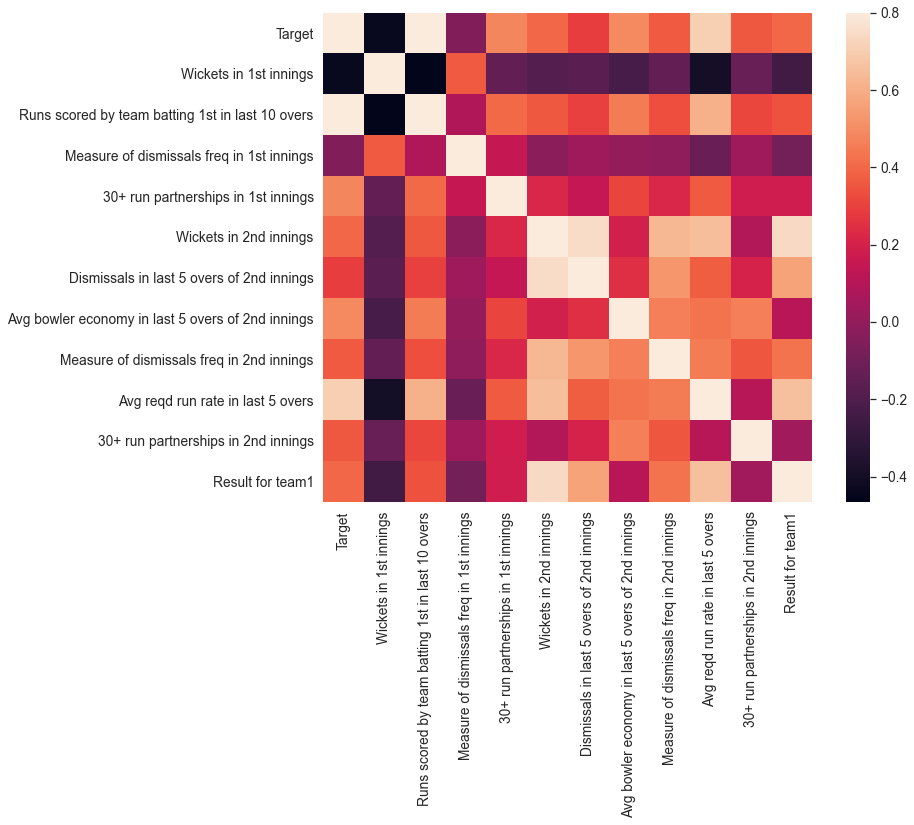

In [ ]:
#team1 correlation matrix
corrmat1 = team1_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, vmax=.8, square=True)

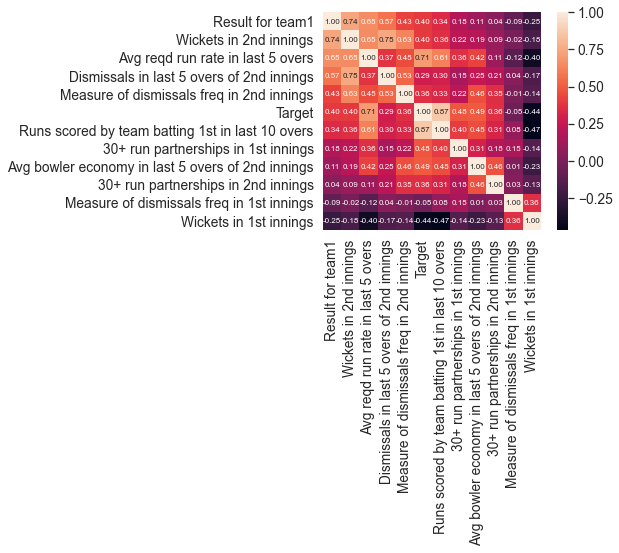

In [ ]:
#team1 result correlation matrix
k = 12 #number of variables for heatmap
cols = corrmat1.nlargest(k, 'Result for team1')['Result for team1'].index
cm = np.corrcoef(team1_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#From the above plot, it is evident that 1st team highly increases its chances of winning by :-

#Taking more wickets while bowling in 2nd innings
#Keeping the required run rate for batting side high in the last 5 overs
#Taking more wickets in the death overs
#Taking wickets more frequently while bowling to prevent high-run partnerships
#Setting a good target score in the 1st innings
#Scoring a lot of runs in the last 10 overs 

#Also,having more 30+ run partnerships and bowling economically in the death overs of 2nd innings helps.

#It is negatively affected by:-
#Losing too many wickets while batting
#Frequently losing wickets while batting

<AxesSubplot:>

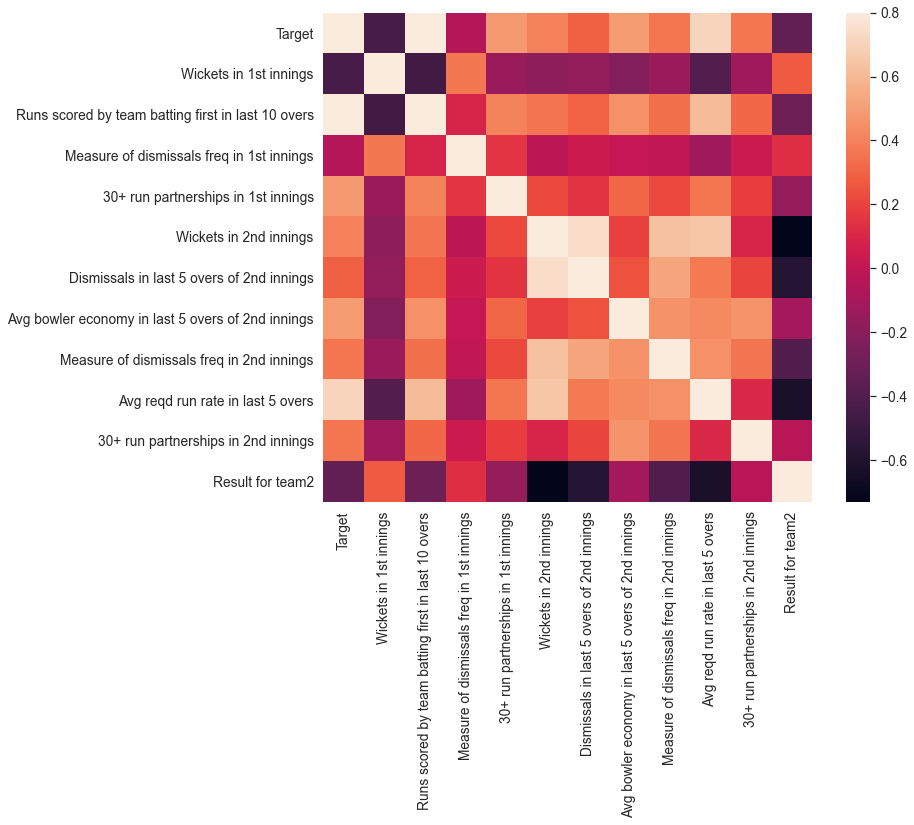

In [ ]:
#team2 correlation matrix
corrmat2 = team2_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=.8, square=True)

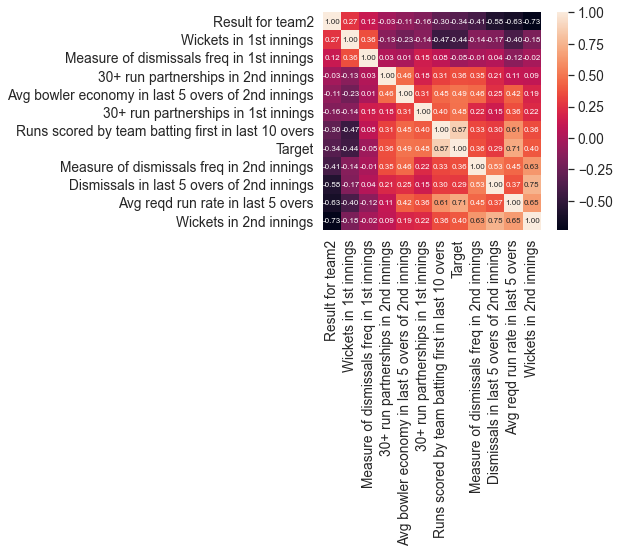

In [ ]:
#team2 result correlation matrix
k = 12 #number of variables for heatmap
cols = corrmat2.nlargest(k, 'Result for team2')['Result for team2'].index
cm = np.corrcoef(team2_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#From the above plot, it is evident that the 2nd team negatively impacts its chances of winning while chasing by:-

#Losing too many wickets while chasing
#Having a high required run rate for the death overs
#Losing too many wickets in the death overs
#Frequently losing wickets while chasing
#Having a high target score to chase

#It is also affected by:-
 
#Allowing opposing team batsmen to score freely in the last 10 overs of 1st innings
#Not being able to break partnerships while bowling
#Economical bowling by opposition bowlers in the death overs of 2nd innings

#It can increase its chances of winning by:-

#Taking more wickets while bowling
#Taking wickets frequently while bowling

In [ ]:
#Which teams should a company endorse for its products ?

#It has been observed that teams which have played a significant number of seasons and have performed consistently well
#throughout IPL history are more likely to have a bigger fan following, especially among people who live in neutral cities or 
#locations that are not represented by an IPL franchise. Hence we can follow the ratings assigned to each team to get an idea of 
#their appeal:

over_teams

,Total matches,Matches won,Matches lost,Matches tied,No result,Win Percent,Titles won,Ratings
Teams,,,,,,,,
Mumbai Indians,187.0,109.0,76.0,2.0,0.0,58.288770,4.0,40.819964
Chennai Super Kings,164.0,100.0,63.0,1.0,0.0,60.975610,3.0,35.792683
Kolkata Knight Riders,178.0,92.0,83.0,3.0,0.0,51.685393,2.0,27.172285
Sunrisers Hyderabad,108.0,58.0,48.0,2.0,0.0,53.703704,1.0,21.944444
Rajasthan Royals,147.0,75.0,67.0,3.0,2.0,51.724138,1.0,21.350575
Deccan Chargers,75.0,29.0,46.0,0.0,0.0,38.666667,1.0,17.433333
Royal Challengers Bangalore,180.0,84.0,91.0,2.0,3.0,47.457627,0.0,14.237288
Kings XI Punjab,176.0,82.0,92.0,2.0,0.0,46.590909,0.0,13.977273
Delhi Daredevils,161.0,67.0,91.0,1.0,2.0,42.138365,0.0,12.641509


In [ ]:
#which players should a company endorse for its products ?

#It has been observed that players who have performed consistently well throughout multiple IPL seasons are more likely to have 
#a bigger fan following, especially among people who live in neutral cities or locations that are not represented by an IPL
#franchise. We can check out a list of players with the most 'Player of the Match' awards to get an idea of their appeal:-

mtc['player_of_match'].value_counts().head(20)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           12
V Sehwag          11
DR Smith          11
AD Russell        11
A Mishra          11
JH Kallis         10
KA Pollard        10
SE Marsh           9
AT Rayudu          9
Name: player_of_match, dtype: int64